# Decay model experiment
Author: Aleksander Filip Żarnecki (University of Warsaw)

In [1]:
import math
import numpy as np
import scipy.stats as scist
import matplotlib.pyplot as plt

### (1) Define decay time experiment

In [2]:
# Model experiment: throw dice and remove those which show '1'  (0 when generating from 0 to 5)

def nDecTime(Nini):
    t = 0
    Ntot = Nini
    while Ntot>0 :
        dice = np.random.randint(6,size=Ntot)   # generate Ntot numbers
        Ndec = np.sum(dice==0)
        Ntot-=Ndec
        t+=1
    
    return t    # Returns time when Ntot==0

### (2) Run multiple experiments

In [3]:
# Number of decay sequences to measure

Ntry = 100000

# Number of dice 

Ndice =100

# Array to store results

exp_data = np.empty(Ntry)

# Main experiment loop

for i in  range(Ntry):
    exp_data[i] = nDecTime(Ndice)

In [4]:
# Print numerical result

tmean = np.mean(exp_data)
tstd = np.std(exp_data)    

print("Average time from model:  %.2f +/- %.2f" % (tmean,tstd))

Average time from model:  28.95 +/- 6.99


### (3) Compare with expectations

In [5]:
# Assume continous decay time
# Sum average times for each decay
# At each decay, decay time is given by exponential distribution
# Exponential distribution is a special case of Gamma distribution

tsum = 0       # Decay time sum
t2sum = 0      # Decay time variance sum

t1 = 1./np.log(1.2)     #   Single dice mean lifetime from  exp(-1/t) = 5/6

for idec in range(Ndice):
    Nleft = Ndice - idec
    twait = t1/Nleft       # With Nleft dice, the average waiting time is t1/Nleft
    tsum += twait
    t2sum += twait*twait

In [6]:
# Print theoretical result

print("Average time estimate: %.2f +/- %.2f" % (tsum,np.sqrt(t2sum)))

Average time estimate: 28.45 +/- 7.01


### (4) Plot results

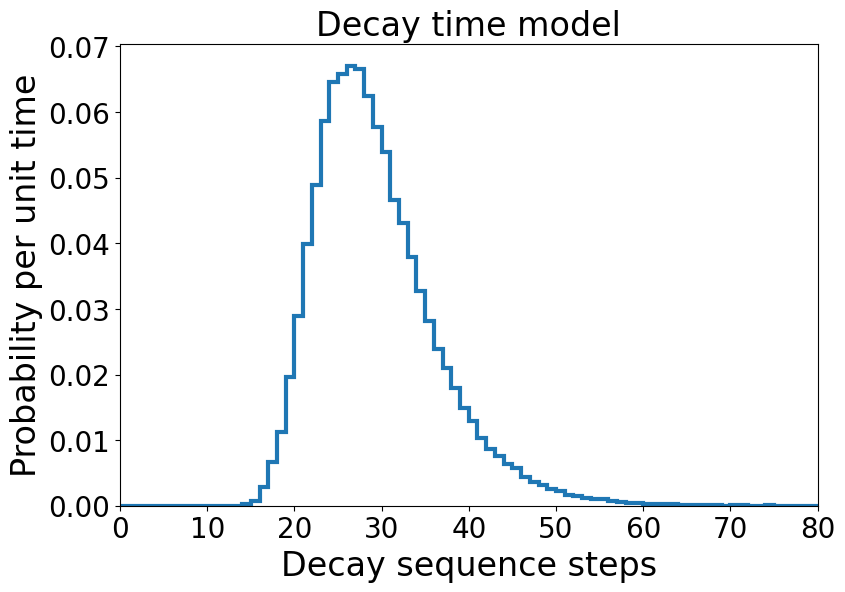

In [7]:
# Hiostogram range

tmax = 80.  # maximum decay time
Nbin = 80   # number of bins

# Plot histogram

plt.figure(figsize=(9, 6))

plt.hist(exp_data,bins=Nbin, range=[0.,tmax], density=True, log=False, histtype='step',linewidth=3)

plt.xlabel('Decay sequence steps',size=24)
plt.ylabel('Probability per unit time',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Decay time model",size=24)
plt.xlim([0.,tmax])

fname = '03_radioactivity.png'
plt.savefig(fname)

plt.show()

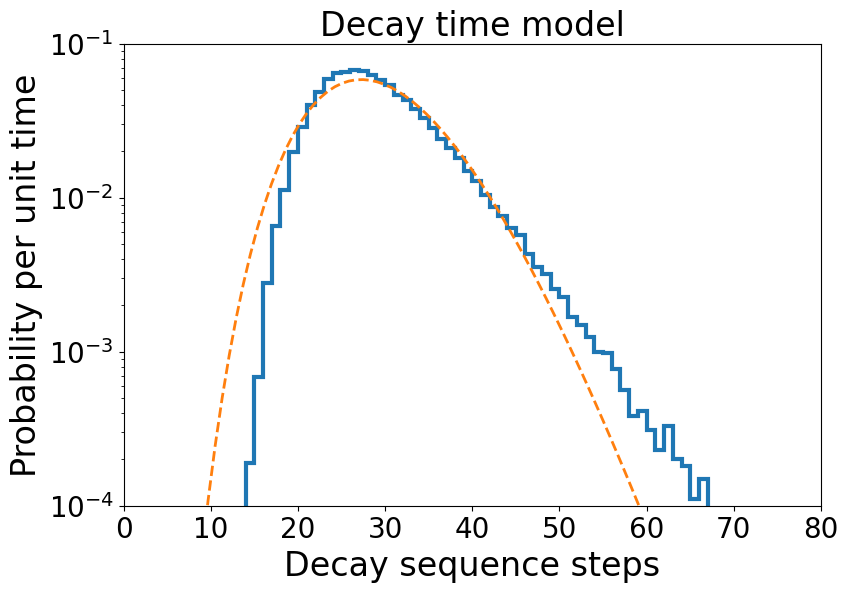

In [8]:
plt.figure(figsize=(9, 6))

plt.hist(exp_data,bins=Nbin, range=[0.,tmax], density=True, log=True, histtype='step',linewidth=3)

plt.xlabel('Decay sequence steps',size=24)
plt.ylabel('Probability per unit time',size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title("Decay time model",size=24)
plt.xlim([0.,tmax])
plt.ylim([0.0001,0.1])

# Expected distribution

scl = tstd*tstd/tmean
alf = tmean/scl

def myExp(x):
    return scist.gamma.pdf(x,alf,scale=scl)

tref = np.linspace(0.,tmax,100)
pref = myExp(tref)

plt.plot(tref,pref,'--',linewidth=2)

fname = '03_radioactivity_2.png'
plt.savefig(fname)

plt.show()